
 
Task1: 

"Is there a correlation between age, Resting Blood Pressure, Cholesterol, Maximum Heart Rate, old Peak and the risk of developing heart disease, and if so, how strong is it?"



Task 2 : EDA

In [218]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
raw_data = pd.read_csv('heart.csv') #Reading dataset into data frame
raw_data.head() #Showing first 5 enteries of data frame

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
raw_data.isnull().sum() #checking for null values in features

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
raw_data['Sex'] = raw_data['Sex'].map({'F':0,'M':1}) #Mapping string features to numerical type
raw_data.head() 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [15]:
raw_data['ChestPainType'].unique() #Finding out unique values so we can map them in numeric form

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [16]:
raw_data['ChestPainType'] = raw_data['ChestPainType'].map({'ATA':0, 'ASY':1, 'NAP':2, 'TA':3})

In [27]:
raw_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,0,130,283,0,2,98,0,0.0,2,0
3,48,0,1,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [18]:
raw_data['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [19]:
raw_data['RestingECG'] = raw_data['RestingECG'].map({'LVH':0,'Normal':1,'ST':2})

In [21]:
raw_data['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [23]:
raw_data['ExerciseAngina'] = raw_data['ExerciseAngina'].map({'N':0, 'Y':1})

In [25]:
raw_data['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [26]:
raw_data['ST_Slope'] = raw_data['ST_Slope'].map({'Down':0, 'Flat':1, 'Up':2})

In [29]:
raw_data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [30]:
print('Duplicate rows in the dataset:', raw_data.duplicated().sum()) #checking for duplicate values

Duplicate rows in the dataset: 0


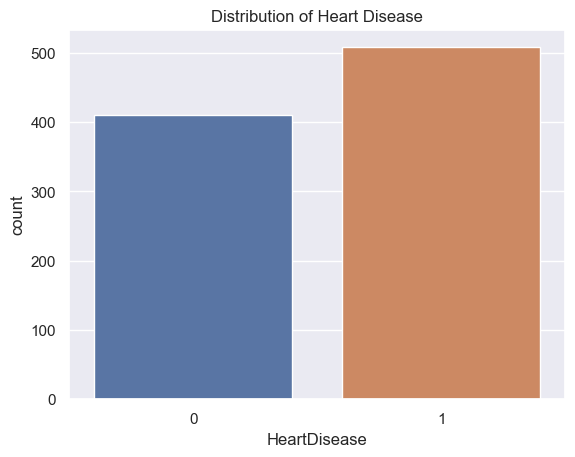

In [35]:
sns.countplot(x='HeartDisease', data=raw_data)
plt.title('Distribution of Heart Disease') #plotting heart disease against all data
plt.show()

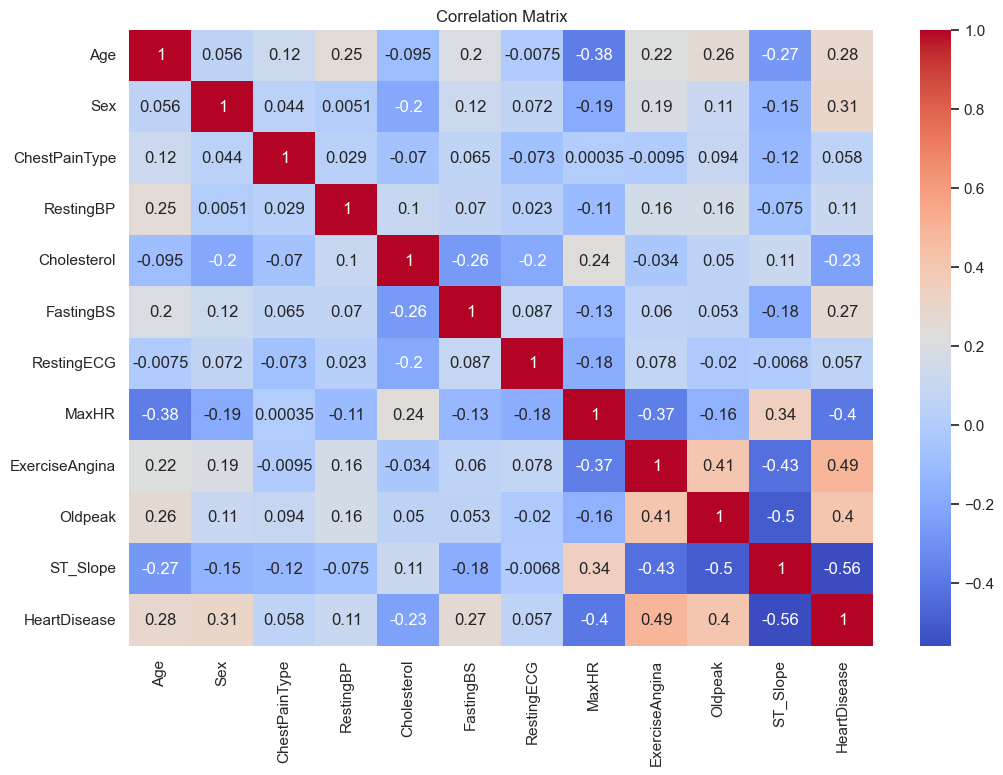

In [36]:
plt.figure(figsize=(12,8)) #plotting correlation grapgh to find out best correlated features to the heart disease
sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Age, Sex, MaxHR, ExerciseAngina, oldPeak, ST_Slope

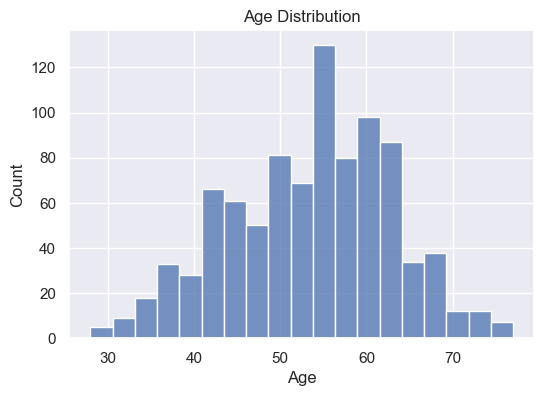

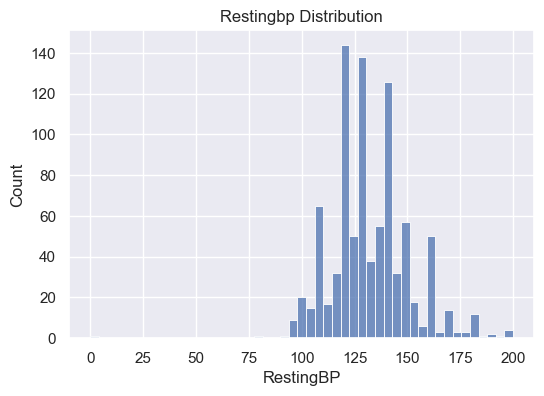

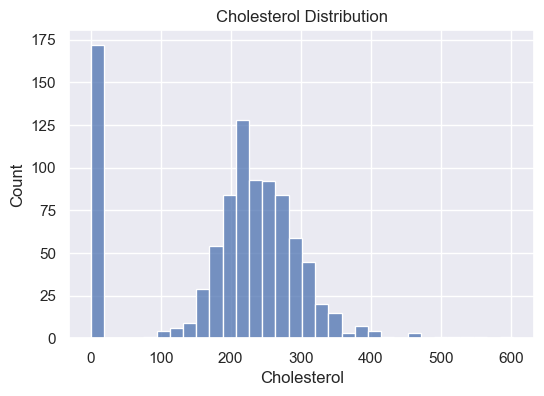

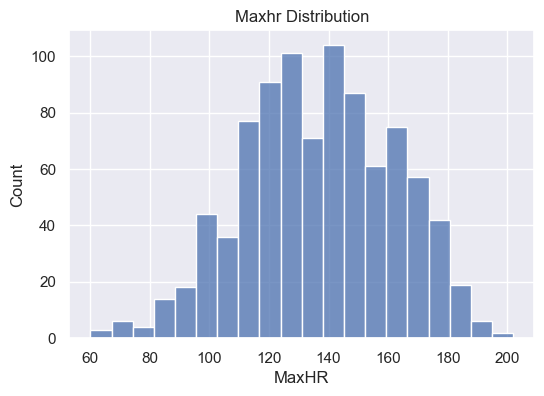

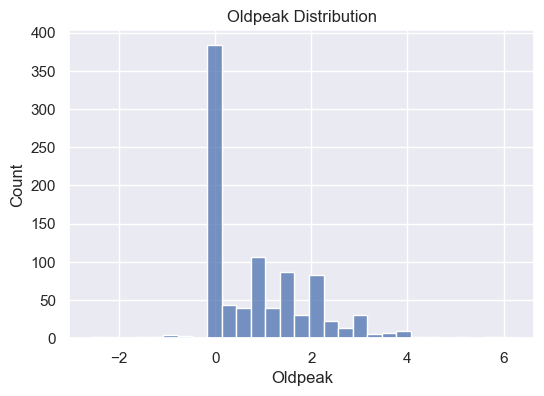

In [39]:
#plotting all numerical features to search for outliers
numerical_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for var in numerical_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(raw_data[var], kde=False)
    plt.title(f'{var.capitalize()} Distribution')
    plt.xlabel(var)
    plt.show()

In [40]:
#removing outliers from cholesterol feature using quantile function and creating a new data frame with non outliers
q = raw_data['Cholesterol'].quantile(0.1)
data = raw_data[raw_data['Cholesterol'] > q ]


In [41]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,0,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,0,130,283,0,2,98,0,0.0,2,0
3,48,0,1,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


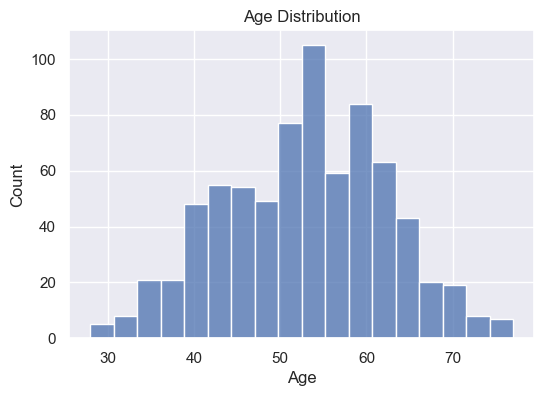

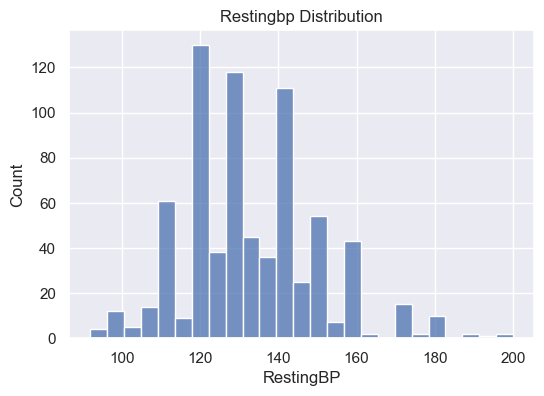

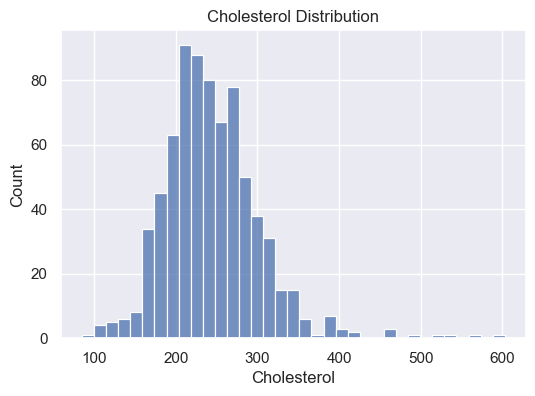

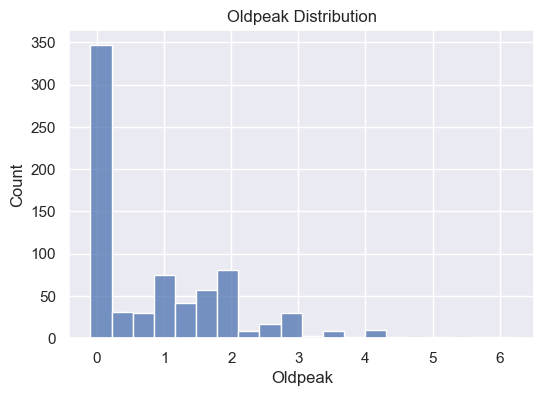

In [110]:
#plotting all numerical features to verify that there are no outliers in the new data frame
numerical_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for var in numerical_vars:
    plt.figure(figsize=(6,4))
    sns.histplot(data[var], kde=False)
    plt.title(f'{var.capitalize()} Distribution')
    plt.xlabel(var)
    plt.show()

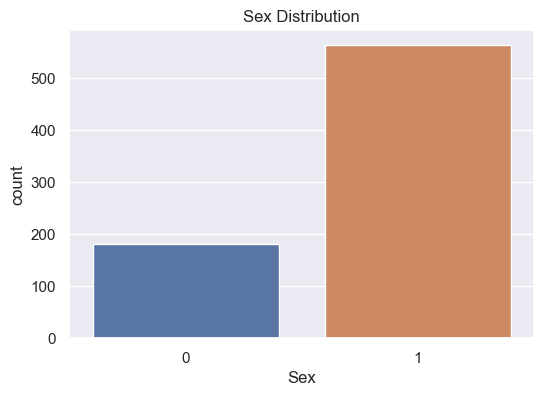

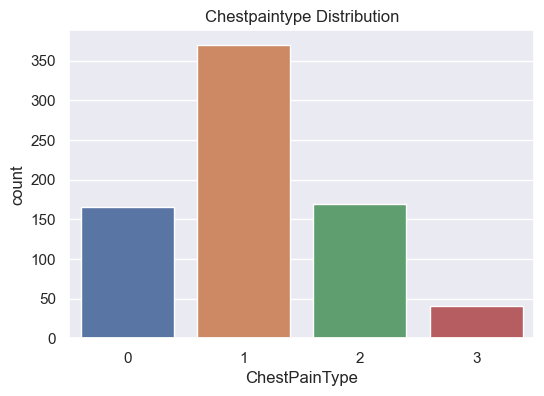

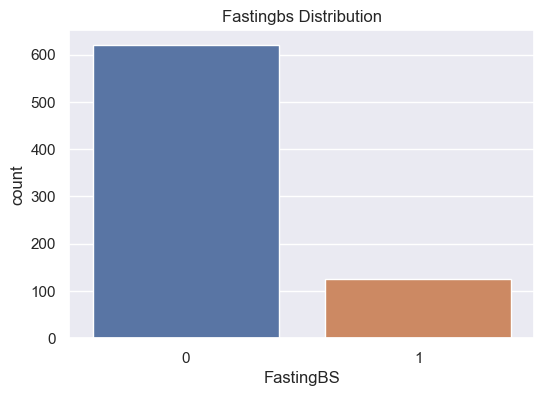

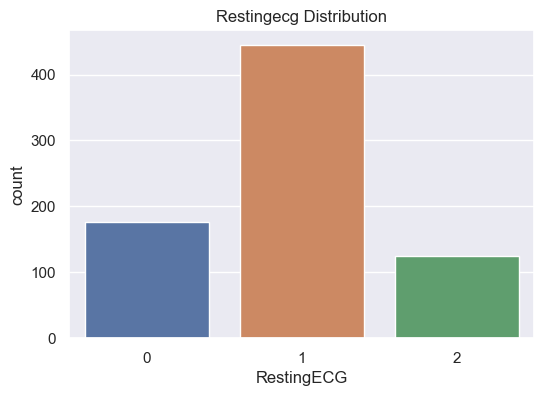

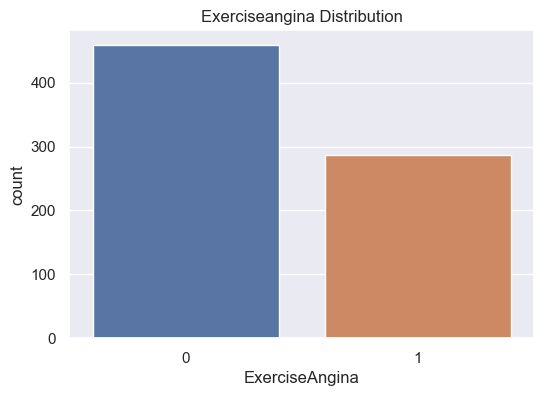

In [256]:
#plotting all categorical features to search for outliers
categorical_vars = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina']
for var in categorical_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, data=data)
    plt.title(f'{var.capitalize()} Distribution')
    plt.show()

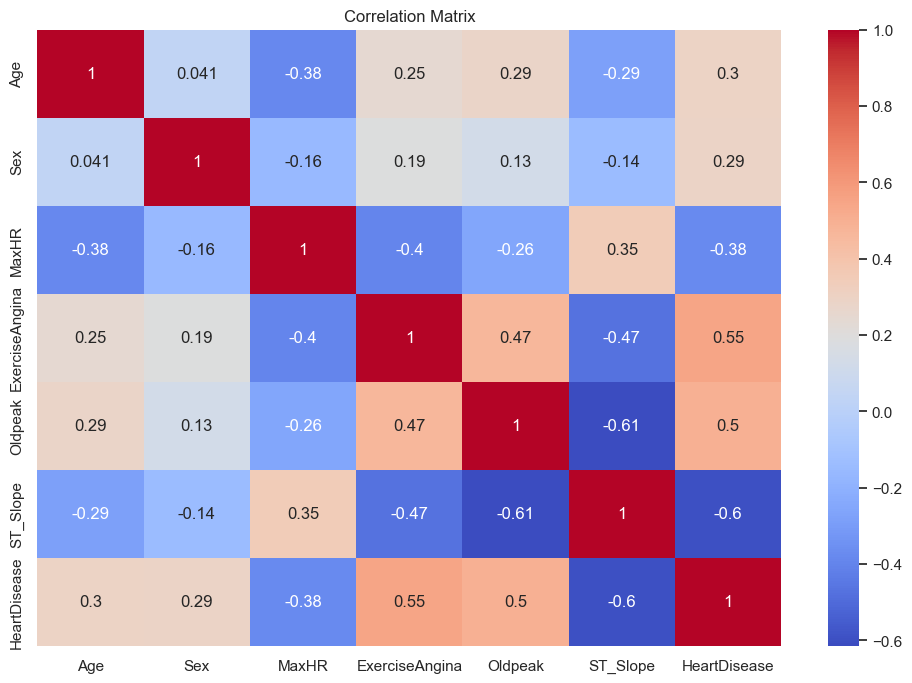

In [287]:
#plotting correlation graph between features written in task 1 and heart disease
corr_data = data[['Age', 'Sex', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']]
plt.figure(figsize=(12,8))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [294]:
# Summary of the selected features
stats = corr_data.describe()

# Compute median for selected fetures
median = corr_data.median()
print("Median of data is: ", median)

Median of data is:  Age                54.0
Sex                 1.0
MaxHR             140.0
ExerciseAngina      0.0
Oldpeak             0.5
ST_Slope            1.0
HeartDisease        0.0
dtype: float64


In [295]:
stats

,Age,Sex,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,140.226542,0.384718,0.901609,1.410188,0.477212
std,9.505888,0.429762,24.524107,0.486855,1.072861,0.598076,0.499816
min,28.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,46.000000,1.000000,122.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000
75%,59.000000,1.000000,160.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [261]:
#From the correlation graph, we can see that Age, Sex, MaxHR, ExerciseAngina, oldPeak, ST_Slope have highest co relation we will use them for ML
inputs = data[['Age', 'Sex', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
target = data['HeartDisease']

In [262]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.33, random_state=342) #Splitting data into 80 and 20 ratio


In [263]:
#Defining XGBClassfier
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state = 42,     max_depth=3,
    reg_alpha=0.1,
    reg_lambda=1,
    gamma=0.1)
#fitting our train set in XGBClassifier
xgb_model.fit(x_train, y_train, early_stopping_rounds=10, eval_set=[(x_test, y_test)])

[0]	validation_0-logloss:0.55731
[1]	validation_0-logloss:0.48792
[2]	validation_0-logloss:0.44328
[3]	validation_0-logloss:0.41355
[4]	validation_0-logloss:0.39293
[5]	validation_0-logloss:0.38417
[6]	validation_0-logloss:0.37346
[7]	validation_0-logloss:0.36951
[8]	validation_0-logloss:0.35955
[9]	validation_0-logloss:0.35746
[10]	validation_0-logloss:0.35256
[11]	validation_0-logloss:0.35305
[12]	validation_0-logloss:0.35147
[13]	validation_0-logloss:0.35167
[14]	validation_0-logloss:0.35011
[15]	validation_0-logloss:0.35005
[16]	validation_0-logloss:0.35097
[17]	validation_0-logloss:0.35205
[18]	validation_0-logloss:0.35319
[19]	validation_0-logloss:0.34576
[20]	validation_0-logloss:0.34353
[21]	validation_0-logloss:0.34408
[22]	validation_0-logloss:0.34332
[23]	validation_0-logloss:0.34611
[24]	validation_0-logloss:0.34618
[25]	validation_0-logloss:0.34564
[26]	validation_0-logloss:0.34517
[27]	validation_0-logloss:0.34366
[28]	validation_0-logloss:0.34530
[29]	validation_0-loglos

d:\Anaconda\envs\tf_gpucheck\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [266]:
#evalutaing performance of model on test set
y_pred_test = xgb_model.predict(x_test)
acc = accuracy_score(y_pred_test, y_test)

In [267]:
acc

0.854251012145749

In [276]:
#Creating Logistic Regression object with L1 regularization and fitting train data in it
log1 = LogisticRegression(penalty='l1', solver='liblinear')
log1.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [280]:
#evalutaing performance of model on test set
y_pred = log1.predict(x_test)


In [281]:
acc = accuracy_score(y_pred, y_test)
acc

0.8461538461538461

In [283]:
#Creating Logistic Regression object with L2 regularization and fitting train data in it
log2 = LogisticRegression(penalty='l2')
log2.fit(x_train, y_train)

LogisticRegression()

In [284]:
#evalutaing performance of model on test set
y_pred = log2.predict(x_test)
acc = accuracy_score(y_pred, y_test)
acc

0.8421052631578947